In [39]:
import pandas as pd
plt.rcParams['font.family'] = 'AppleGothic'

import pandas as pd

# 데이터 로드
file_path = '다문화통합데이터_수용성환산_cp949.csv'
data = pd.read_csv(file_path, encoding='cp949')

# 데이터의 기본 정보 및 처음 몇 줄 확인
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   행정구                             25 non-null     object 
 1   2022_초등학생수_계                    25 non-null     int64  
 2   2022_중학교_계                      25 non-null     int64  
 3   2022_고등학교_계                     25 non-null     int64  
 4   2022_초등학생_국내출생자녀_소계             25 non-null     int64  
 5   2022_초등학생_외국인가정자녀_소계            25 non-null     int64  
 6   2022_초등학생_중도입국자녀_소계             25 non-null     int64  
 7   2022_다문화가구_소계                   25 non-null     int64  
 8   2022_가구원_소계                     25 non-null     int64  
 9   2021_합계_소계                      25 non-null     int64  
 10  2021_한국국적을 가지지 않은 자_소계          25 non-null     int64  
 11  2022_인구                         25 non-null     int64  
 12  2022_인구밀도                       25 non

(None,
    행정구  2022_초등학생수_계  2022_중학교_계  2022_고등학교_계  2022_초등학생_국내출생자녀_소계  \
 0  종로구           163          72           84                  103   
 1   중구           269          72           99                  130   
 2  용산구           408         139           79                  219   
 3  성동구           439         135           47                  286   
 4  광진구           505         140           65                  279   
 
    2022_초등학생_외국인가정자녀_소계  2022_초등학생_중도입국자녀_소계  2022_다문화가구_소계  2022_가구원_소계  \
 0                    46                   14           1178         3067   
 1                   127                   12           1327         3372   
 2                   154                   35           2259         6020   
 3                   124                   29           2156         5730   
 4                   199                   27           2703         6623   
 
    2021_합계_소계  ...  도서관개수  다문화가족복지센터개수  다문화언어강사인원  어린이복지센터개수  \
 0       12009  ...      9          

In [9]:
missing_values = data.isnull().sum()

from sklearn.preprocessing import StandardScaler

districts = data['행정구']
data_numeric = data.drop('행정구', axis=1)

# 데이터 스케일링
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

missing_values, data_scaled.head()


(행정구                               0
 2022_초등학생수_계                      0
 2022_중학교_계                        0
 2022_고등학교_계                       0
 2022_초등학생_국내출생자녀_소계               0
 2022_초등학생_외국인가정자녀_소계              0
 2022_초등학생_중도입국자녀_소계               0
 2022_다문화가구_소계                     0
 2022_가구원_소계                       0
 2021_합계_소계                        0
 2021_한국국적을 가지지 않은 자_소계            0
 2022_인구                           0
 2022_인구밀도                         0
 소비경기지수                            0
 2023_초등학교수                        0
 2022 년_종류별 주택수                    0
 2018_다문화시민인식_종합                   0
 2018_인구감소문제 해결 위해 외국인 이민정책 필요     0
 2018_결혼 이민자에 대한 사회적 편견해소 정책 필요    0
 2018_이민자 많아지면 일자리 빼앗길 것 같다        0
 서울전체세대                            0
 서울전체인구                            0
 한국인                               0
 등록외국인                             0
 세대당인구                             0
 65세이상고령자                          0
 총생활인구수                            0
 

## PCA 진행

(array([2.73855972e-01, 2.39695710e-01, 7.42797307e-02, 6.75469901e-02,
        6.07105173e-02, 4.41567374e-02, 4.11133686e-02, 3.55722440e-02,
        3.13745063e-02, 2.67144791e-02, 2.33845401e-02, 1.64089629e-02,
        1.58454505e-02, 1.25076853e-02, 9.77832756e-03, 6.68688286e-03,
        5.83578856e-03, 4.57424331e-03, 3.54385118e-03, 2.49859775e-03,
        1.59502015e-03, 1.06570874e-03, 8.81974986e-04, 3.72710514e-04,
        1.60806891e-33]),
 array([0.27385597, 0.51355168, 0.58783141, 0.6553784 , 0.71608892,
        0.76024566, 0.80135903, 0.83693127, 0.86830578, 0.89502026,
        0.9184048 , 0.93481376, 0.95065921, 0.96316689, 0.97294522,
        0.9796321 , 0.98546789, 0.99004214, 0.99358599, 0.99608459,
        0.99767961, 0.99874531, 0.99962729, 1.        , 1.        ]))

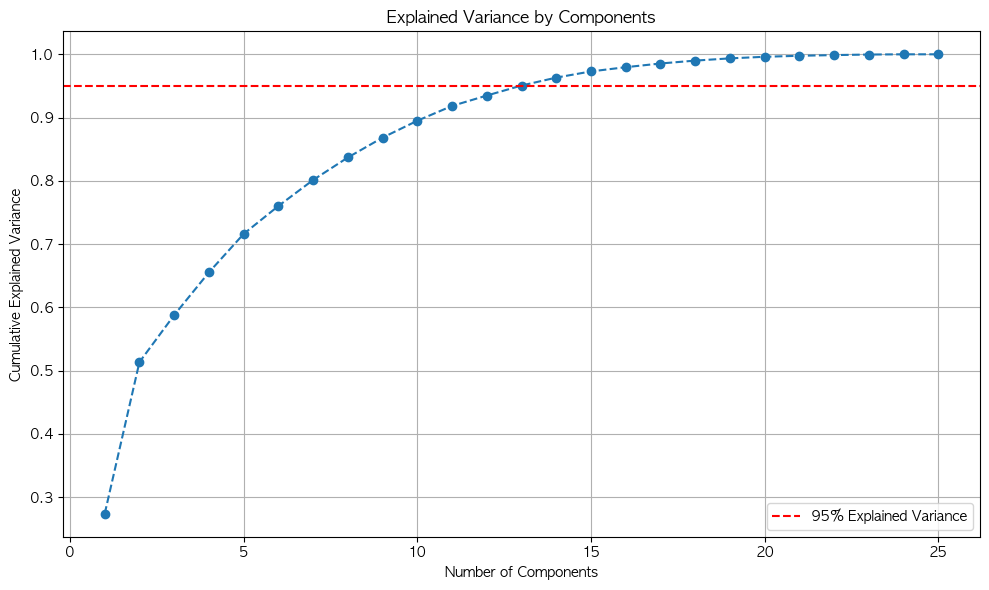

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()

pca.fit(data_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Explained Variance")
plt.legend(loc="lower right")
plt.tight_layout()

explained_variance_ratio, cumulative_explained_variance


/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_39666/2066252549.py:23: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


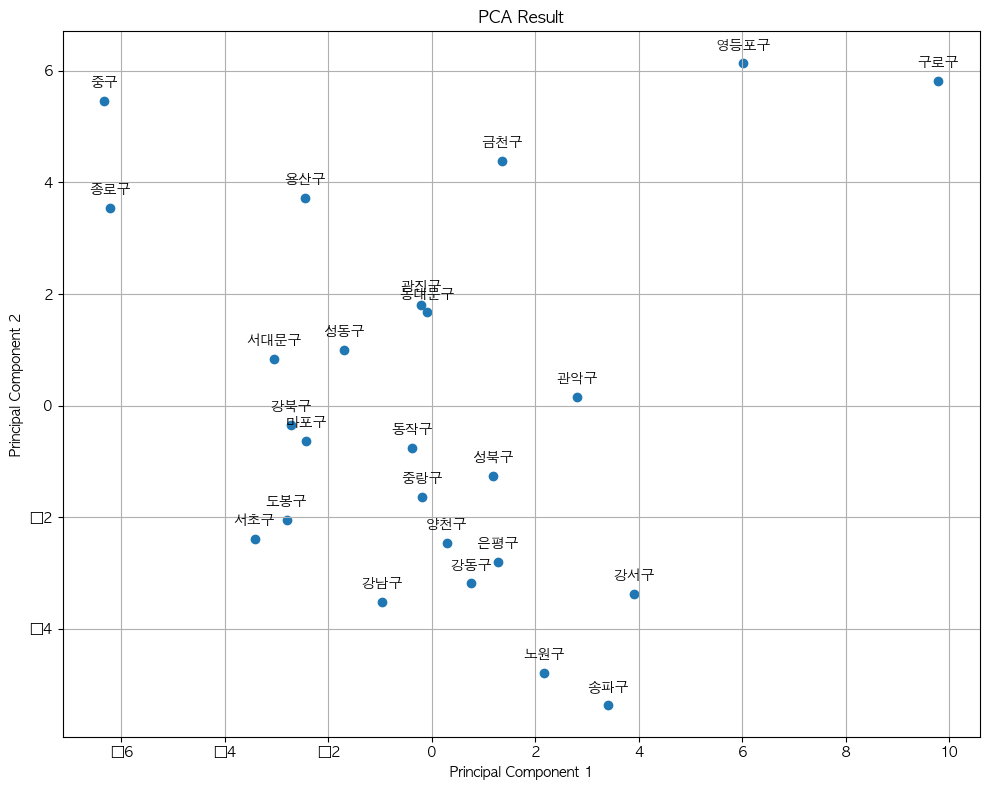

In [13]:
pca = PCA(n_components=5)

pca_result = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['행정구'] = districts

plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(pca_df['행정구']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.tight_layout()
plt.show()


# PCA 5개 70% 설명가능

In [40]:
data_without_district = data.drop(columns=['행정구'])

pca_components = pd.DataFrame(pca.components_, columns=data_without_district.columns, 
                              index=[f'PC{i}' for i in range(1, 6)])
pca_components_transposed = pca_components.T

principal_components = {}
for i, component in enumerate(pca_components.index):
    sorted_weights = pca_components_transposed[component].sort_values(ascending=False)
    principal_components[component] = sorted_weights

principal_components


{'PC1': 2022_가구원_소계                       0.261050
 2022_초등학생_중도입국자녀_소계               0.255678
 2022_다문화가구_소계                     0.251083
 2022_중학교_계                        0.245712
 2022_초등학생수_계                      0.244315
 2022_초등학생_국내출생자녀_소계               0.221024
 어린이집개수                            0.215591
 2022_초등학생_외국인가정자녀_소계              0.191734
 2022_고등학교_계                       0.189295
 2021_합계_소계                        0.189022
 서울전체세대                            0.183962
 65세이상고령자                          0.183213
 2022_인구                           0.179362
 서울전체인구                            0.178909
 어린이복지센터개수                         0.172715
 2021_한국국적을 가지지 않은 자_소계            0.172621
 한국인                               0.171578
 2023_초등학교수                        0.163781
 2022 년_종류별 주택수                    0.159387
 2022_특별학급수                        0.149223
 2022_인구밀도                         0.125459
 2022_중점학교수                        0.124770
 등록외국인                   

PC1 (Principal Component 1): <br>

주요 변수: 2022_가구원_소계, 2022_초등학생_중도입국자녀_소계, 2022_다문화가구_소계 등. <br>
해석: 이 주성분은 주로 다문화 가구와 관련된 통계와 연관되어 있습니다. 이는 다문화 가구의 수, 초등학생 중 중도입국자녀의 수 등 다문화 가구와 관련된 여러 변수들이 이 주성분에 큰 가중치를 가지기 때문입니다. 따라서 PC1은 다문화 가구의 분포와 크기를 나타내는 성분으로 해석될 수 있습니다. <br>

PC2 (Principal Component 2): <br>

주요 변수: 2018_이민자 많아지면 일자리 빼앗길 것 같다, 2018_다문화시민인식_종합, 2022_출생 등. <br>
해석: 이 주성분은 다문화 인식과 관련된 설문조사 결과와 인구 출생에 큰 가중치를 가지고 있습니다. 이로부터 PC2는 다문화에 대한 인식과 인구 동태를 나타내는 성분으로 해석될 수 있습니다. <br>

PC3 (Principal Component 3): <br>

주요 변수: 사회적 신뢰_국내 거주 외국인, 2018_다문화시민인식_종합 등. <br>
해석: 이 주성분은 주로 사회적 신뢰와 다문화 시민 인식에 관한 변수들과 연관되어 있습니다. PC3는 다문화 시민에 대한 사회적 신뢰와 인식을 나타내는 성분으로 볼 수 있습니다. <br>
PC4 (Principal Component 4): <br>

주요 변수: 사회적 약자 수용 여부_외국인 노동자, 사회적 약자 수용 여부_난민, 사회적 약자에 대한 태도 등. <br>
해석: 이 주성분은 사회적 약자에 대한 수용 여부와 태도에 관련된 변수들에 큰 가중치를 가지고 있습니다. 이를 통해 PC4는 사회적 약자에 대한 인식과 수용 태도를 나타내는 성분으로 해석될 수 있습니다. <br>
PC5 (Principal Component 5): <br>

주요 변수: 2018_다문화시민인식_종합, 자원봉사활동 경험 여부, 중국외외국인체류인구수 등. <br>
해석: 이 주성분은 다문화 시민 인식, 자원봉사 활동 경험, 외국인 체류 인구수와 관련된 변수들과 연관되어 있습니다. PC5는 다문화 인식과 사회 참여 활동을 나타내는 성분으로 볼 수 있습니다. <br>

## Elbow method

/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/an

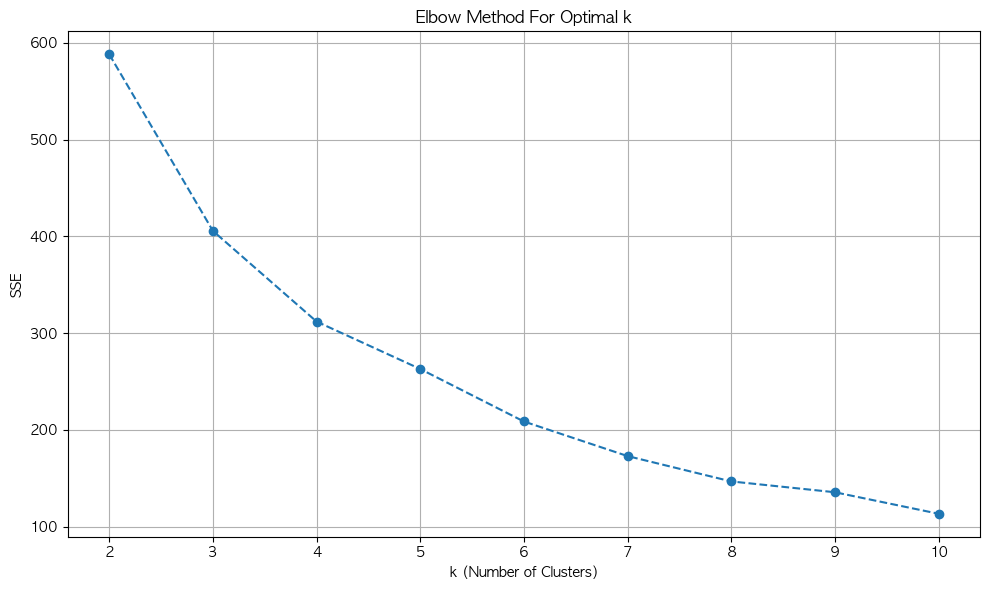

In [14]:
from sklearn.cluster import KMeans

sse = []
k_values = range(2, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('SSE')
plt.grid(True)
plt.tight_layout()
plt.show()


# K-means 

/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_39666/3012526962.py:23: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


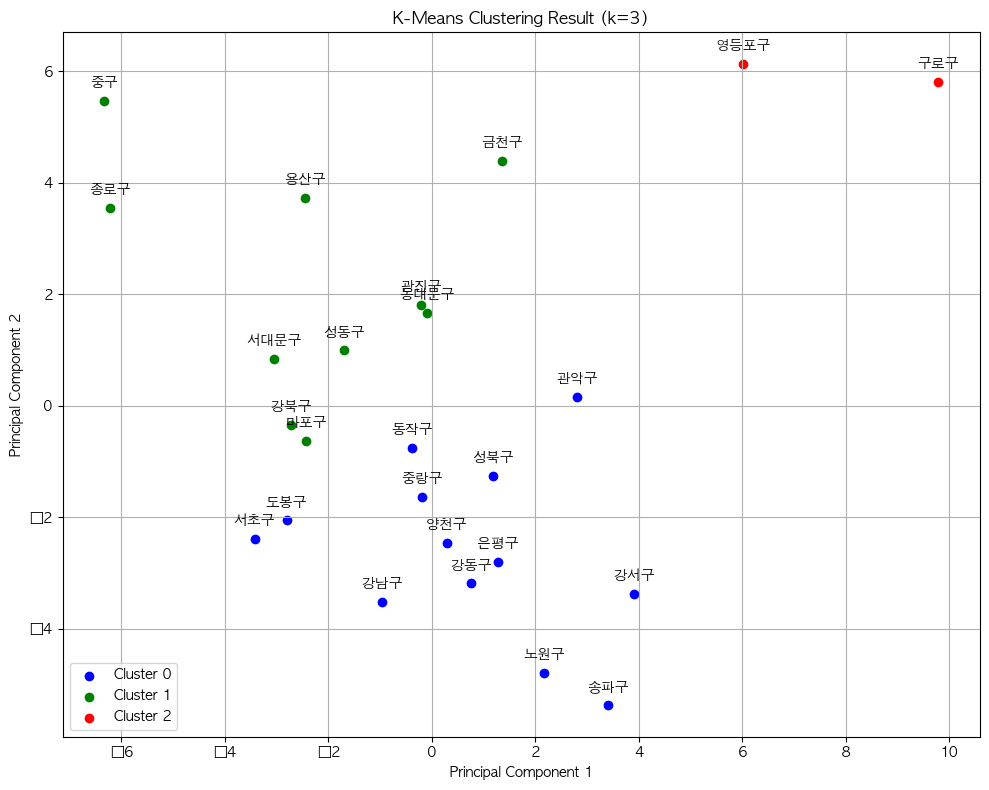

{0: ['중랑구',
  '성북구',
  '도봉구',
  '노원구',
  '은평구',
  '양천구',
  '강서구',
  '동작구',
  '관악구',
  '서초구',
  '강남구',
  '송파구',
  '강동구'],
 1: ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '강북구', '서대문구', '마포구', '금천구'],
 2: ['구로구', '영등포구']}

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_result)

plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r']
for i, color in enumerate(colors):
    plt.scatter(pca_df[pca_df['Cluster'] == i]['PC1'], 
                pca_df[pca_df['Cluster'] == i]['PC2'], 
                color=color, label=f'Cluster {i}')

plt.title('K-Means Clustering Result (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(pca_df['행정구']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 클러스터에 속한 행정구 출력
clustered_districts = {i: list(pca_df[pca_df['Cluster'] == i]['행정구']) for i in range(3)}
clustered_districts


In [18]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = pca_df['Cluster']

cluster_mean = data_with_cluster.groupby('Cluster').mean()

cluster_mean.transpose()


/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_39666/2950056643.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean = data_with_cluster.groupby('Cluster').mean()


Cluster,0,1,2
2022_초등학생수_계,464.230769,417.100000,1286.500000
2022_중학교_계,160.615385,137.000000,467.500000
2022_고등학교_계,82.692308,74.200000,181.000000
2022_초등학생_국내출생자녀_소계,349.769231,250.500000,436.500000
2022_초등학생_외국인가정자녀_소계,80.692308,142.100000,788.000000
2022_초등학생_중도입국자녀_소계,33.769231,24.500000,62.000000
2022_다문화가구_소계,2722.384615,2324.000000,7159.000000
2022_가구원_소계,7463.461538,5992.800000,16752.500000
2021_합계_소계,11944.615385,16803.100000,51716.000000
2021_한국국적을 가지지 않은 자_소계,9000.846154,14384.100000,43114.000000


## 계층적 군집화

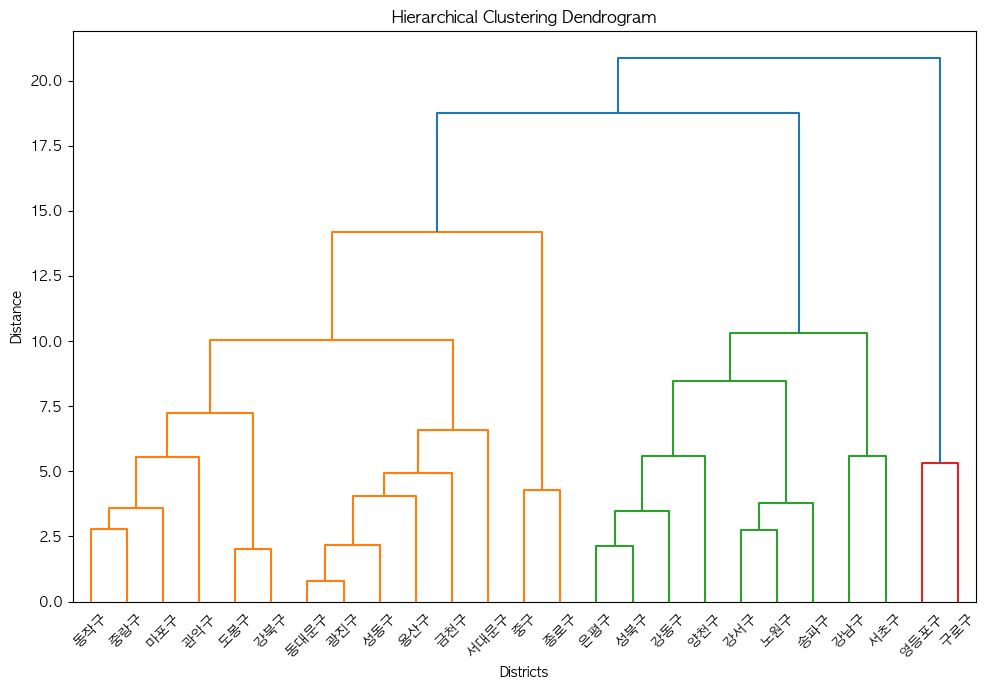

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 군집화 수행
linked = linkage(pca_result, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=list(districts), distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Districts")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_39666/3571176014.py:27: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


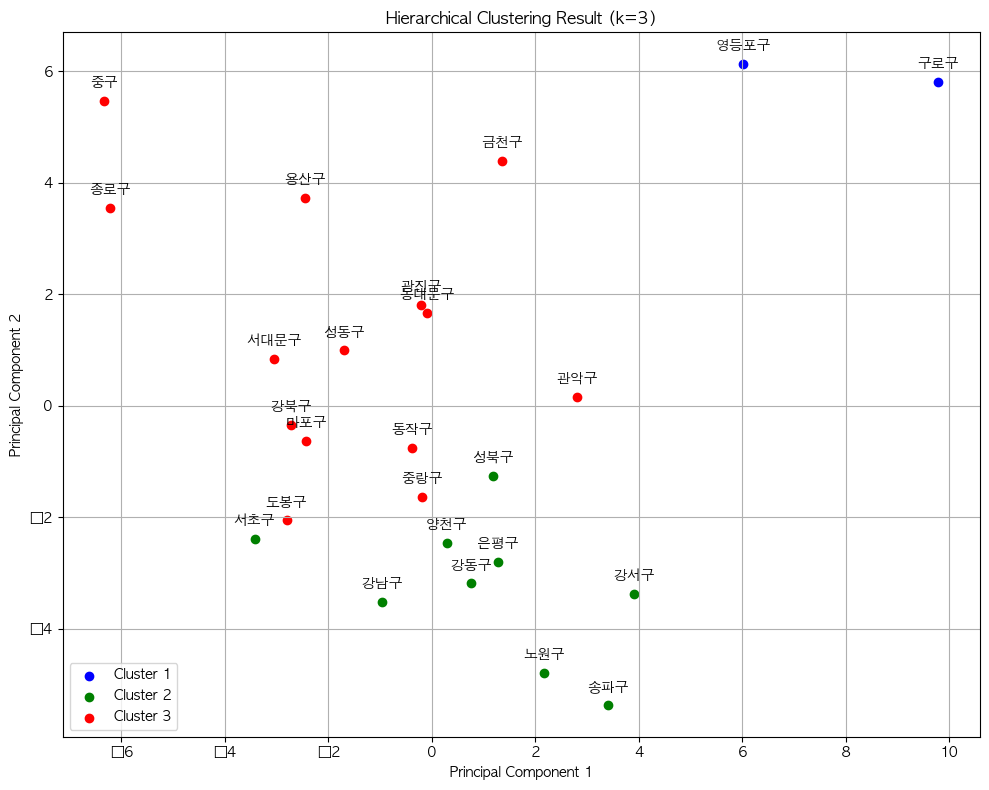

{1: ['구로구', '영등포구'],
 2: ['성북구', '노원구', '은평구', '양천구', '강서구', '서초구', '강남구', '송파구', '강동구'],
 3: ['종로구',
  '중구',
  '용산구',
  '성동구',
  '광진구',
  '동대문구',
  '중랑구',
  '강북구',
  '도봉구',
  '서대문구',
  '마포구',
  '금천구',
  '동작구',
  '관악구']}

In [20]:
from scipy.cluster.hierarchy import fcluster

hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

pca_df['Hierarchical_Cluster'] = hierarchical_labels

plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r']
for i, color in enumerate(colors):
    plt.scatter(pca_df[pca_df['Hierarchical_Cluster'] == i+1]['PC1'], 
                pca_df[pca_df['Hierarchical_Cluster'] == i+1]['PC2'], 
                color=color, label=f'Cluster {i+1}')

plt.title('Hierarchical Clustering Result (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i, txt in enumerate(pca_df['행정구']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

hierarchical_clustered_districts = {i: list(pca_df[pca_df['Hierarchical_Cluster'] == i]['행정구']) for i in range(1, 4)}
hierarchical_clustered_districts


# 가우시안혼합모델

In [22]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
pca_df['GMM_Cluster'] = gmm.fit_predict(pca_result)

pca_df[['행정구', 'Cluster', 'Hierarchical_Cluster', 'GMM_Cluster']]


,행정구,Cluster,Hierarchical_Cluster,GMM_Cluster
0,종로구,1,3,2
1,중구,1,3,2
2,용산구,1,3,2
3,성동구,1,3,0
4,광진구,1,3,0
5,동대문구,1,3,0
6,중랑구,0,3,0
7,성북구,0,2,0
8,강북구,1,3,0
9,도봉구,0,3,0


# DBSCAN 실패

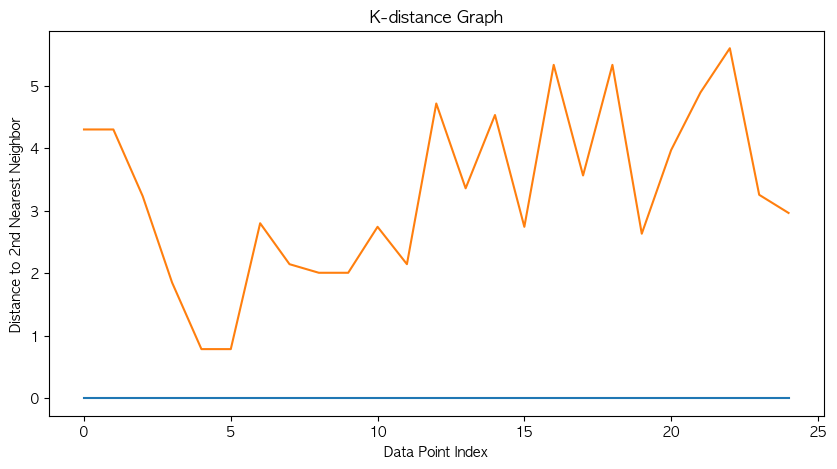

In [24]:
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Point Index')
plt.ylabel('Distance to 2nd Nearest Neighbor')
plt.show()


K-distance 그래프에서 급격한 변화가 일어나는 지점("elbow point")을 eps 값으로 선택하는 것이 일반적입니다. 그래프를 보면 대략 1.5 정도에서 급격한 변화가 있어 이 값을 eps로 선택할 수 있습니다.

이제 min_samples 값을 선택해야 합니다. 일반적으로, min_samples 값은 차원의 수보다 크게 설정하는 것이 좋습니다. 이 경우 3차원 데이터를 사용하고 있으므로 min_samples를 4 정도로 설정해볼 수 있습니다.

In [25]:
# DBSCAN 군집화
dbscan = DBSCAN(eps=1.5, min_samples=4)
pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(pca_result)

# 클러스터별 데이터 포인트 수 확인
pca_df['DBSCAN_Cluster'].value_counts()


-1    25
Name: DBSCAN_Cluster, dtype: int64

In [26]:
# DBSCAN 군집화 with adjusted parameters
dbscan = DBSCAN(eps=2, min_samples=3)
pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(pca_result)

# 클러스터별 데이터 포인트 수 확인
pca_df['DBSCAN_Cluster'].value_counts()


-1    22
 0     3
Name: DBSCAN_Cluster, dtype: int64

- 클러스터링 안되는 듯 

# SpectralClustering

In [32]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering 군집화
spectral = SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors')
pca_df['Spectral_Cluster'] = spectral.fit_predict(pca_result)

pca_df['Spectral_Cluster'].value_counts()


2    12
0     9
1     4
Name: Spectral_Cluster, dtype: int64

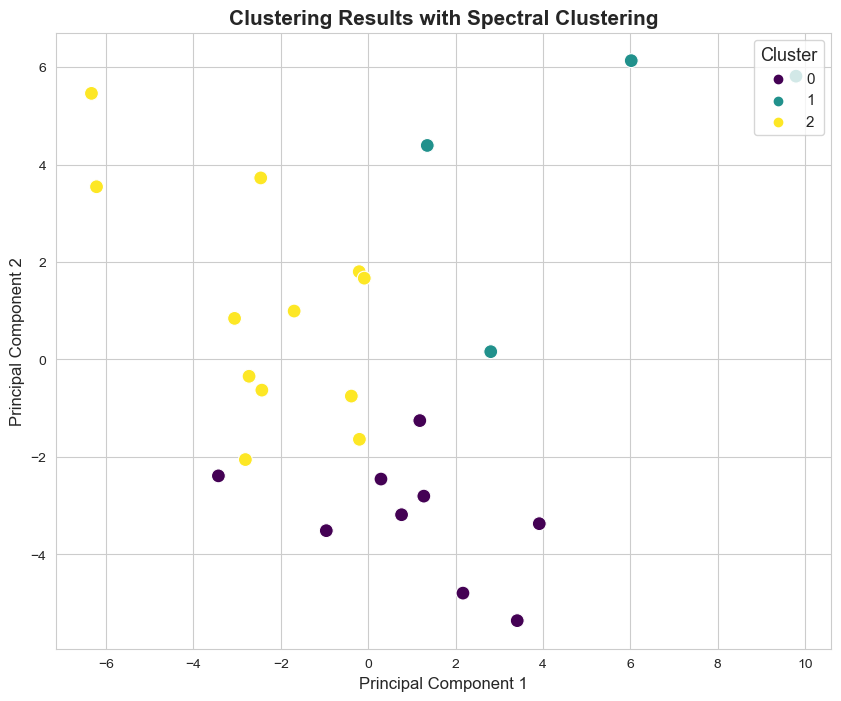

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.scatterplot(x='PC1', y='PC2', hue='Spectral_Cluster', palette="viridis", 
                data=pca_df, s=100)

plt.title('Clustering Results with Spectral Clustering', fontsize=15, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', loc='upper right', fontsize=11)

plt.grid(True)
plt.show()


# 보팅

In [38]:
# 필요한 모듈과 함수 재정의
from collections import Counter
from scipy.stats import mode

# 보팅을 통한 최종 클러스터 결정 함수
def determine_final_cluster(row):
    # 각 지역의 클러스터링 결과를 카운트
    counts = Counter(row)
    # 가장 많이 등장한 클러스터를 최종 클러스터로 결정
    return mode(row)[0][0]

# 클러스터링 결과 컬럼
cluster_columns = ['Cluster', 'Hierarchical_Cluster', 'GMM_Cluster', 'Spectral_Cluster']

# 보팅을 통한 최종 클러스터 결정
pca_df['Final_Cluster'] = pca_df[cluster_columns].apply(determine_final_cluster, axis=1)

# 최종 클러스터에 속한 행정구 출력
final_clustered_districts = {i: list(pca_df[pca_df['Final_Cluster'] == i]['행정구']) for i in range(3)}
final_clustered_districts


/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_39666/3138972528.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(row)[0][0]


{0: ['성동구',
  '광진구',
  '동대문구',
  '중랑구',
  '성북구',
  '강북구',
  '도봉구',
  '노원구',
  '은평구',
  '서대문구',
  '마포구',
  '양천구',
  '강서구',
  '동작구',
  '관악구',
  '서초구',
  '강남구',
  '송파구',
  '강동구'],
 1: ['구로구', '금천구', '영등포구'],
 2: ['종로구', '중구', '용산구']}

# 보팅 결과 시각화

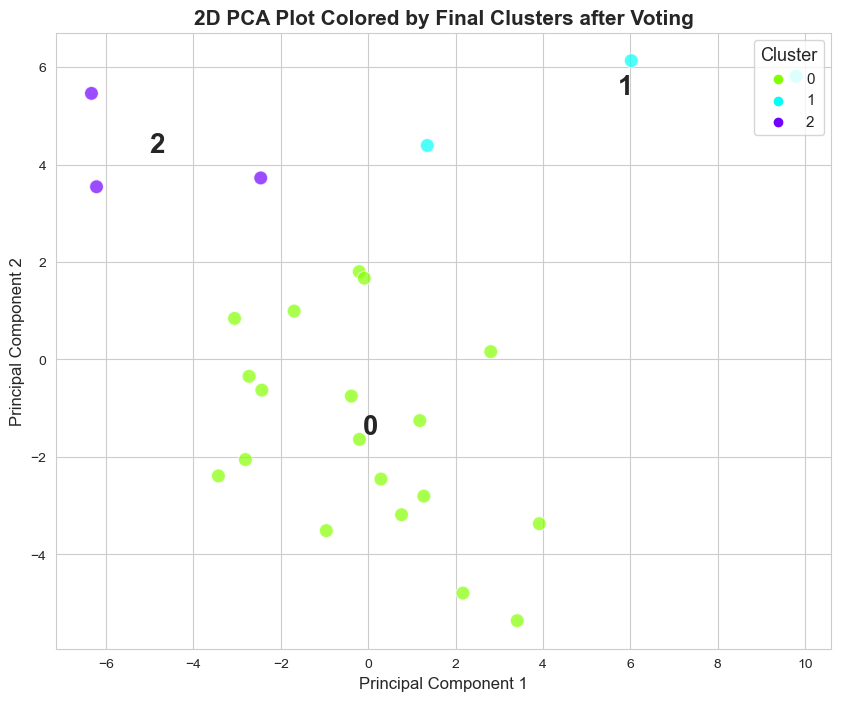

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 설정
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
palette = sns.color_palette("hsv", 3)

# 2차원 평면에 데이터를 표시
scatter = sns.scatterplot(x='PC1', y='PC2', hue='Final_Cluster', data=pca_df, palette=palette, s=100, alpha=0.7)

# 클러스터의 중심을 표시
for cluster in range(3):
    x = pca_df[pca_df['Final_Cluster'] == cluster]['PC1'].mean()
    y = pca_df[pca_df['Final_Cluster'] == cluster]['PC2'].mean()
    plt.text(x, y, str(cluster), fontsize=20, fontweight='bold')

# 그래프 제목 및 레이블 설정
plt.title('2D PCA Plot Colored by Final Clusters after Voting', fontsize=15, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# 범례 표시
plt.legend(title='Cluster', title_fontsize='13', loc='upper right', fontsize=11)

# 그래프 출력
plt.show()


In [46]:
data_with_final_cluster = data.copy()
data_with_final_cluster['Final_Cluster'] = pca_df['Final_Cluster']

cluster_mean = data_with_final_cluster.groupby('Final_Cluster').mean()

cluster_characteristics = {}

for cluster in range(3):
    high_values = cluster_mean.loc[cluster] > data_with_final_cluster.drop(columns=['행정구', 'Final_Cluster']).mean()
    cluster_characteristics[cluster] = list(high_values[high_values].index)

cluster_characteristics


/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_39666/3830932398.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean = data_with_final_cluster.groupby('Final_Cluster').mean()


{0: ['2022_초등학생_국내출생자녀_소계',
  '2022_인구',
  '2022_인구밀도',
  '2023_초등학교수',
  '2022 년_종류별 주택수',
  '2018_결혼 이민자에 대한 사회적 편견해소 정책 필요',
  '서울전체세대',
  '서울전체인구',
  '한국인',
  '세대당인구',
  '65세이상고령자',
  '서울시민 자부심',
  '사회적 약자에 대한 태도',
  '지역사회 소속감_서로도움',
  '자원봉사활동 경험 여부',
  '어린이집개수',
  '도서관개수',
  '어린이복지센터개수'],
 1: ['2022_초등학생수_계',
  '2022_중학교_계',
  '2022_고등학교_계',
  '2022_초등학생_국내출생자녀_소계',
  '2022_초등학생_외국인가정자녀_소계',
  '2022_초등학생_중도입국자녀_소계',
  '2022_다문화가구_소계',
  '2022_가구원_소계',
  '2021_합계_소계',
  '2021_한국국적을 가지지 않은 자_소계',
  '2022_인구밀도',
  '소비경기지수',
  '2018_다문화시민인식_종합',
  '2018_인구감소문제 해결 위해 외국인 이민정책 필요',
  '2018_결혼 이민자에 대한 사회적 편견해소 정책 필요',
  '2018_이민자 많아지면 일자리 빼앗길 것 같다',
  '등록외국인',
  '총생활인구수',
  '사회적 약자 수용 여부_외국인 노동자',
  '1년간 기부 경험 여부',
  '어린이집개수',
  '다문화가족복지센터개수',
  '다문화언어강사인원',
  '어린이복지센터개수',
  '2020_1인당 지역내총생산_천원',
  '2020_수준지수',
  '2022_출생',
  '2022_중점학교수',
  '2022_특별학급수'],
 2: ['2022_고등학교_계',
  '소비경기지수',
  '2018_인구감소문제 해결 위해 외국인 이민정책 필요',
  '2018_이민자 많아지면 일자리 빼앗길 것 같다',
  '등록외국인',
  '총생활인구수',
  '중국외외국인체류

클러스터 0: <br>
인구 관련: 전반적으로 높은 인구 밀도와 높은 한국인 인구를 가지고 있습니다.<br>
사회적 태도: 다문화에 대한 사회적 편견 해소 정책이 필요하다고 느끼는 비율이 높습니다.<br>
사회 및 지역 커뮤니티: 서울시민 자부심이 높으며, 사회적 약자에 대한 긍정적인 태도와 지역사회의 소속감(서로 돕기)이 강합니다.<br>
교육 및 문화: 어린이집, 도서관, 어린이 복지 센터 등의 시설이 많습니다.<br>

클러스터 1:<br>
교육: 초등학생, 중학생, 고등학생의 수가 상대적으로 많으며, 다문화 가구 및 가구원 수도 많습니다.<br>
사회적 태도: 다문화 시민 인식이 높으며, 외국인 이민 정책에 대한 필요성과 외국인에 대한 사회적 편견 해소 정책에 대한 필요성을 느낍니다.<br>
인구: 등록 외국인과 총 생활 인구 수가 많습니다.<br>
시설: 어린이집, 다문화 가족 복지 센터, 다문화 언어 강사 인원, 어린이 복지 센터 등의 시설 및 인원이 많습니다.<br>

클러스터 2:<br>
사회적 태도: 외국인 노동자와 난민에 대한 사회적 약자 수용 여부가 높으며, 국내 거주 외국인에 대한 사회적 신뢰도 높습니다.<br>
인구: 등록 외국인과 총 생활 인구 수, 중국 외 외국인 체류 인구 수가 많습니다.<br>
시설: 다문화 가족 복지 센터, 다문화 언어 강사 인원이 많습니다.<br>

이를 통해 클러스터 0은 다문화에 대한 긍정적인 태도와 높은 서울시민 자부심을 가진 지역들로 구성되어 있습니다. 클러스터 1은 다문화 가정과 학생들이 많은 지역들로 구성되어 있습니다. 마지막으로 클러스터 2는 외국인 인구가 많고, 외국인에 대한 사회적 수용이 높은 지역들로 구성되어 있습니다.

---
**다문화 가구가 많은 지역:** 이런 지역에서는 이미 다문화 가구에 대한 수요와 요구가 많을 것으로 예상됩니다. 따라서, 현지에서의 실제 요구와 현재 제공되는 서비스의 상황을 분석하여 추가적인 시설과 서비스가 필요한지 평가합니다.

**다문화 가구 비율은 낮지만, 서비스와 시설이 부족한 지역:** 이런 지역에서는 현재 다문화 가구의 수는 적지만, 그들에게 제공되는 서비스와 시설이 더욱 부족할 수 있습니다. 특히, 소수의 다문화 가구가 집중된 지역에서는 그들의 요구가 무시되거나 간과될 수 있습니다.

In [48]:
# 다문화 가구와 관련 시설 데이터 
multicultural_data = data[['행정구', '2022_다문화가구_소계', '2022_가구원_소계', '어린이집개수', 
                         '도서관개수', '다문화가족복지센터개수', '다문화언어강사인원', '어린이복지센터개수', '총생활인구수']]

# 인구 대비 다문화 가구 및 시설 비율 
multicultural_data['다문화가구비율'] = multicultural_data['2022_다문화가구_소계'] / multicultural_data['총생활인구수']
multicultural_data['다문화시설비율'] = (multicultural_data['다문화가족복지센터개수'] + multicultural_data['어린이복지센터개수']) / multicultural_data['총생활인구수']

# 다문화 가구와 시설과의 상관관계 분석
correlation = multicultural_data[['다문화가구비율', '다문화시설비율']].corr()

# 상위 5개 구와 하위 5개 구를 추출 (다문화 가구 비율 기준)
top_multicultural = multicultural_data.nlargest(5, '다문화가구비율')[['행정구', '다문화가구비율', '다문화시설비율']]
bottom_multicultural = multicultural_data.nsmallest(5, '다문화가구비율')[['행정구', '다문화가구비율', '다문화시설비율']]

correlation, top_multicultural, bottom_multicultural


/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_39666/1776186632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multicultural_data['다문화가구비율'] = multicultural_data['2022_다문화가구_소계'] / multicultural_data['총생활인구수']
/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_39666/1776186632.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multicultural_data['다문화시설비율'] = (multicultural_data['다문화가족복지센터개수'] + multicultural_data['어린이복지센터개수']) / multicultural_data['총생활인구수']


(          다문화가구비율   다문화시설비율
 다문화가구비율  1.000000  0.913334
 다문화시설비율  0.913334  1.000000,
     행정구   다문화가구비율   다문화시설비율
 14  양천구  9.982699  0.087668
 15  강서구  8.568414  0.045855
 11  은평구  8.292645  0.079166
 9   도봉구  8.273234  0.090473
 10  노원구  7.476163  0.086638,
      행정구   다문화가구비율   다문화시설비율
 1     중구  1.037517  0.003127
 0    종로구  1.116325  0.011372
 12  서대문구  1.307247  0.005193
 5   동대문구  1.355043  0.008690
 4    광진구  1.814704  0.009399)

클러스터링 과정에서 다문화 관련 주성분이 높은 가중치를 가져야 하겠다. 이러한 부분이 많이 무시되네